-----

# MNist

[ Kaggle - MNIST 대회 링크 ](https://www.kaggle.com/c/digit-recognizer)

---

## 라이브러리 호출

In [128]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import re

---
## 데이터셋 불러오기 

* tensorflow keras 라이브러리에 있는 mnist 데이터 사용

In [84]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

---
## 데이터 전처리

1. train 데이터와 test 데이터 모두 학습시키기 위해 reshape
2. 정규화를 통해 오버피팅 방지 

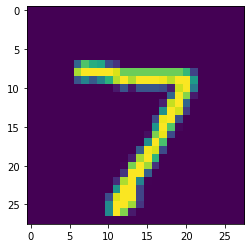

In [85]:
plt.imshow(x_test[0])
plt.show()

In [86]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train, x_test = x_train / 255.0,  x_test / 255.0

---
## 모델 생성

In [87]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

---
## 모델 컴파일 및 학습

In [88]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 292us/sample - loss: 0.1462 - accuracy: 0.9547
Epoch 2/5
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0472 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0342 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0257 - accuracy: 0.9921
Epoch 5/5
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0208 - accuracy: 0.9931


---
## 모델 평가

In [89]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(test_loss, test_accuracy)

10000/1 - 1s - loss: 0.0275 - accuracy: 0.9832
0.05258985600471497 0.9832


In [90]:
predict = model.predict([x_test])

---
## 제출 파일 생성

In [124]:
data = {'label':  np.argmax(predict, axis=1)}

In [125]:
submission = DataFrame(data)
submission

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [132]:
submission.to_csv('E:\dnn\Mnist\mnist_pred.csv', index=True)